# Determinant QMC data visualization

## Are you testing or making plots?

In [61]:
SAVEPLOTS = False

# IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from pylab import *

## Load simulation data

In [62]:
simDir = '../data/2d-hc-nanoribbon-strain'

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv', skiprows = 1)

# Metropolis Sampling convergence

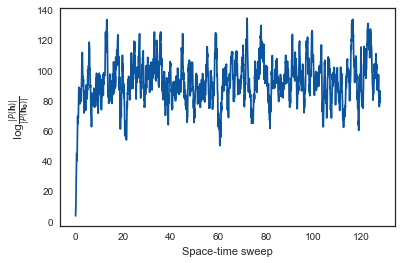

In [63]:
L = 16
plt.plot(np.arange(len(weights)) / L , weights) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights.png', dpi = 600)

# Magnetic structure factor $S(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \left\langle \mathbf S_{\mathbf i} \cdot \mathbf S_{\mathbf j} \right\rangle $

## Auto-correlation time in the measurement of the correlation function

In [64]:
magCorr = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv', skiprows = 1, delimiter = ',')
magCorrErr = np.loadtxt(simDir + '/EqTimeSzCorrelationsError.csv', skiprows = 1, delimiter = ',')

Nx = 6

Ny = 6

plotDir = '../plots/'

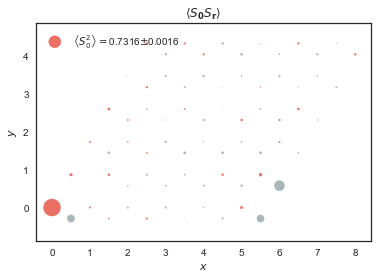

In [65]:
plt.figure(1, figsize = (Nx, Ny))
dist = 1
a1 = dist * np.arange(Nx)
a2 = dist * np.arange(Ny)
vs = np.zeros((2 * Nx * Ny , 2))
lat = np.zeros((2 * Nx * Ny))
latErr = np.zeros((2 * Nx * Ny))
clr = np.chararray((2 * Nx * Ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(Nx):
    for j in range(Ny):
        for k in range(2):
            vs[Nx * Ny * k + Nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 + k *\
            np.array([1 / 2,- 1 / ( 2 * np.sqrt(3) )])
            
            lat[Nx * Ny * k + Nx * j + i]\
            = (magCorr[0, Nx * Ny * k + Nx*j + i])
            
            if magCorr[0, Nx * Ny * k + Nx*j + i] > 0 :
                clr[Nx * Ny * k + Nx * j + i] = "#e74c3c"
            else:
                clr[Nx * Ny * k + Nx * j + i] = "#95a5a6"
            

dotscale = 400

fig, ax = plt.subplots()

plt.ylim(-2, 3)
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_0^2\right\rangle=$' + f'{magCorr[0, 0]:.4f}' + r'$\pm$' + f'{magCorrErr[0, 0]:.4f}')
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}} S_{\mathbf{r}} \right\rangle$')
plt.legend()
#plt.savefig(plotDir + '/CorrelationsDots.png', dpi = 600)

Text(0,0.5,'$\\left\\langle S_{0} S_{x} \\right\\rangle$')

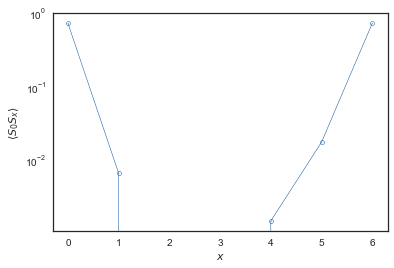

In [68]:
fig, ax = plt.subplots()

ax.semilogy(np.arange(Nx+1), np.hstack([magCorr[0, :Nx],magCorr[0, 0]]), linewidth = 0.5,\
        marker = 'o', markersize = 0.5, markeredgewidth = 4)
             
#ax.errorbar(np.arange(Nx+1), np.abs(np.hstack([magCorr[0, :Nx],magCorr[0, 0]])),\
#           linewidth = 0, elinewidth = 1,\
#            yerr=np.abs(np.hstack([magCorrErr[0, :Nx],magCorrErr[0, 0]])) / np.sqrt(Meas))
plt.xlabel(r'$x$')
plt.ylabel(r'$\left\langle S_{0} S_{x} \right\rangle$')
#plt.ylim(-0.1, 0.1)
#plt.savefig(plotDir + '/LongitudinalProfile.png', dpi = 600)

In [69]:
magCorrErr[0, :Nx]

array([ 0.00160244,  0.00637212,  0.00627756,  0.00625908,  0.00630767,
        0.00625158])

## Fourier transform to obtain the structure factor    

In [70]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/Nx, qMax/Nx)
qsY = np.arange(0, qMax + qMax/Ny, qMax/Ny)
S = np.zeros((Nx+1, Ny+1))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(Nx):
            for y1 in range(Ny):
                for x2 in range(Nx):
                    for y2 in range(Ny):
                        S[idxX, idxY] += 2 * np.cos(0.5 * (x1 - x2) * qx + np.sqrt(3) / 2 *(y1-y2) *qy )\
                        * magCorr[Nx * y1 + x1, Nx*y2 + x2]
                        #S[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx + np.sqrt(3) / 2 *(y1-y2) *qy )\
                        #* magCorr[Nx*Ny + Nx * y1 + x1, Nx * Ny + Nx*y2 + x2]

S /=  (NSITES)


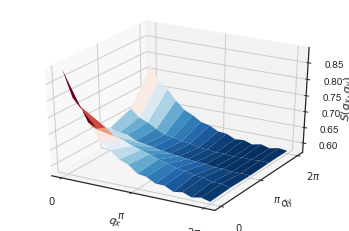

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, S.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
ax.set_xticks([0, np.pi, np.pi * 2])
ax.set_xticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
ax.set_yticks([0, np.pi, np.pi * 2])
ax.set_yticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
plt.savefig(plotDir + '/S(q).png', dpi = 600)

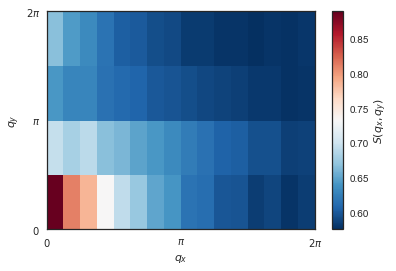

In [72]:
fig, ax = plt.subplots()

p = ax.pcolor(qsX, qsY, S.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
ax.set_xticks([0, np.pi, np.pi * 2])
ax.set_xticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
ax.set_yticks([0, np.pi, np.pi * 2])
ax.set_yticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
cb = fig.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)pcolor.png', dpi = 600)

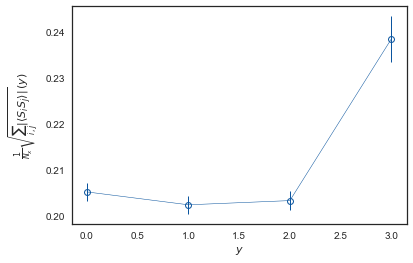

In [92]:
nx = int(NSITES / 2 / ny)

mSq = np.zeros(ny)

mSqErr = np.zeros(ny)

for y in range(ny):
    for x1 in range(nx):
        for x2 in range(nx):
            mSq[y] += abs(magCorr[(nx * y + x1), (nx * y + x2)])
            mSqErr[y] += abs(magCorrErr[(nx * y + x1), (nx * y + x2)])
            

plt.errorbar(np.arange(ny), np.sqrt(mSq) / nx , marker = 'o',\
             markeredgewidth = 6, markersize = 1, linewidth = 0.5,\
            elinewidth = 1, yerr= mSqErr  / np.sqrt(mSq) / 2 / nx )
plt.xlabel(r'$y$')
plt.ylabel(r'$\frac{1}{N_x} \sqrt{\sum_{i, j} | \left\langle S_i S_j \right\rangle |} (y)$')
plt.savefig(plotDir + "/order_parameter_Graphene.png", dpi = 600)

In [95]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/Nx, qMax/Nx)
Stop = np.zeros((Nx+1))
Stoperr = np.zeros((Nx+1))
Sbottom = np.zeros((Nx+1))
Sbottomerr = np.zeros((Nx+1))
dist = 0
             
y1 = ny - 1
y2 = ny - 1
y3 = 0
y4 = 0

for idxX, qx in enumerate(qsX):
    for x1 in range(Nx):
        for x2 in range(Nx):
            Stop[idxX] += 2 * np.cos(0.5 * (x1 - x2) * qx)\
            * magCorr[Nx * y1 + x1, Nx*y2 + x2]
            Stoperr[idxX] += 2 * np.abs(np.cos(0.5 * (x1 - x2) * qx))\
            * magCorrErr[Nx * y1 + x1, Nx*y2 + x2]
            
            Sbottom[idxX] += 2 * np.cos(0.5 * (x1 - x2) * qx)\
            * magCorr[Nx * y3 + x1, Nx*y4 + x2]
            Sbottom[idxX] += 2 * np.abs(np.cos(0.5 * (x1 - x2) * qx))\
            * magCorrErr[Nx * y3 + x1, Nx*y4 + x2]

Stop /=  Nx
Stoperr /=  Nx

Sbottom /=  Nx
Sbottomerr /=  Nx

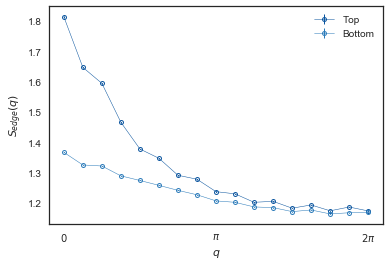

In [96]:
fig, ax = plt.subplots()
ax.set_xticks([0, np.pi, np.pi * 2])
ax.set_xticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
ax.errorbar(qsX, Stop, marker = 'o', markeredgewidth = 4, markersize = 1, linewidth = 0.5,\
        elinewidth = 1, yerr= Stoperr / np.sqrt(Meas), label = 'Top' )
ax.errorbar(qsX, Sbottom, marker = 'o', markeredgewidth = 4, markersize = 1, linewidth = 0.5,\
        elinewidth = 1, yerr= Sbottomerr / np.sqrt(Meas), label = 'Bottom' )
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$S_{edge}(q)$')
plt.legend()
plt.savefig(plotDir + "/edgeStFactor_Graphene.png", dpi = 600)